# A/B Testing Motivation

We have a current webpage. We want to implement a new webpage which is desired to have 2% higher of conversion. To measure the efficiency of the B-webpage, we must have two groups:

        - Group A: Control group, which is the one we evaluate the conversion of A-webpage.
        - Group B: Treatment group, which is the one we evaluate the performance of the B-webpage.
        
Thus, we will compare the performance of each webpage. The test must be performed by taking a sample from the population. 

#### Execution

- The groups must be homogeneous between each other. We have to create 2 groups randomly.
- We have to assure that the difference between conversions are not from the randomness of the samples and the sample size. We may avoid this problem by using a statistical inference method to decide if whether the data can support a particular hypothesis.
- To construct the hypothesis:

        A: the current scenario (status quo), without modifications. (null hypothesis)
            
        B: the new scenario, with some new implementation or modification. (alternative hypothesis)
        
#### Rational


**1.** We assume the **hypothesis A** as true. By doing this, we assume that there is no difference between the webpages. **(null hypothesis)**

**2.** By assuming **hypothesis A** as true and that there is no difference between the pages, if we observe a conversion value very far from each other, it may be caused by the experiment randomness.

**3.** If the probability (p-value) of happening the difference between the pages (null hypothesis) is very high: the randomness effect is so low that we may admit that the difference is caused by the pages. 

        That means: If the p-value is low, we reject the null hypothesis in favor of the alternative hypothesis. If it is high, we do not have enough evidence to reject the null hypothesis.
        
        The "high value" means higher than an alpha value (confidence value) we define. Usually, alpha is 0.05. Alpha is the maximum of randomness we admit.
        
**The main rational is:** if the probability **(p-value)** of happening the null hypothesis is higher than the maximum randomness **(alpha)** we admitted, therefore the null hypothesis is "more important" than randomness and we cannot reject null hypothesis - because we have low effect of randomness. But if the p-value is lower than the maximum randomness we admitted, thus the randomness is "more important" than the null hypothesis and therefore we may reject the null hypothesis. 
        

# Libraries

In [1]:
import pandas as pd


In [56]:
import numpy as np
import math
import pingouin as pg
import seaborn as sns
from statsmodels.stats import api as sms
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp

# Loading Data

In [3]:
pwd

'/Users/lucasquemelli/Documents/repos/AB testing'

In [4]:
data = pd.read_csv("/Users/lucasquemelli/Documents/repos/AB testing/ab_data.csv")

In [5]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
data.shape

(294478, 5)

# 1. Experiment Design

Based on the bussiness, we must define the hypotheses and the type of the test. We cannot use both of the tests mentioned below, we must choose only one.

## 1.1. Formulation of Hypotheses

As we already defined above, the hypotheses are as follows:

**1. Hypothesis A**: we assume that there is no difference between the webpages. **(null hypothesis)**

**2. Hypothesis B:** we assume that there is significant difference between the webpages. **(alternative hypothesis)**

## 1.2. One-tailed Test

A one-tailed test, also known as a one-sided test, is a statistical test used to determine if the sample data falls into a specific direction from the hypothesized population parameter. In a one-tailed test, the alternative hypothesis specifies a particular direction of the effect or difference being tested.

For example, if we are testing whether a new drug increases the average lifespan of patients, the one-tailed test would focus on whether the drug increases lifespan without considering the possibility of it decreasing lifespan.

The decision to use a one-tailed test depends on the specific research question and the directional hypothesis being tested. One-tailed tests are often used when there is strong theoretical or practical justification to expect an effect in a specific direction.

It's important to note that one-tailed tests can be more powerful than two-tailed tests in detecting effects in the specified direction, but they also carry the risk of overlooking effects in the opposite direction. Therefore, researchers should carefully consider the choice of test based on the nature of the research question and the potential consequences of Type I and Type II errors.

- **Null hypothesis:** when the probability of happen the null hypothesis (p<sub>0</sub>) is equal to the probability of happen the alternative hypothesis (p).
## H<sub>0</sub>: p = p<sub>0</sub>

- **Alternative hypothesis:** when the probability of happen the alternative hypothesis (p) is higher the probability of happen the null hypothesis (p<sub>0</sub>).
## H<sub>1</sub>: p > p<sub>0</sub>

**ATTENTION:** to use this test we must aske ourselves if the effect can only goes to one direction. Could that only be higher? Could that only be lower?

## 1.3. Two-tailed Test

By comparing two webpages, the effect is not only one direction: the conversion may be higher or lower. At such a situation we use the two-tailed test.

A two-tailed test, also known as a two-sided test, is a statistical test used to determine if there is a significant difference between the observed sample data and the hypothesized population parameter in either direction. In a two-tailed test, the alternative hypothesis typically states that the parameter is not equal to a specific value, without specifying a particular direction of the effect.

For example, if we are testing whether a new teaching method affects test scores, the two-tailed test would check whether there is a significant difference in test scores, regardless of whether they increase or decrease.

The decision to use a two-tailed test is often made when there is no prior expectation or justification for a particular direction of the effect. It allows for a more conservative approach by considering the possibility of differences in both directions.

In a two-tailed test, the critical region is split into two equal parts, with rejection regions in both tails of the distribution. The test statistic is compared to the critical values corresponding to the desired level of significance, typically α (alpha), divided equally between the two tails.

It's important to note that two-tailed tests are generally less powerful than one-tailed tests for detecting effects in a specific direction. However, they provide a more comprehensive assessment of the data by considering the possibility of differences in both directions.

Researchers should carefully consider the choice of test based on the specific research question, the nature of the data, and any prior theoretical or empirical evidence regarding the direction of the effect.

- **Null hypothesis:** when the probability of happen the null hypothesis (p<sub>0</sub>) is equal to the probability of happen the alternative hypothesis (p).
## H<sub>0</sub>: p = p<sub>0</sub>

- **Alternative hypothesis:** when the probability of happen the alternative hypothesis (p) is different of the probability of happen the null hypothesis (p<sub>0</sub>).
## H<sub>1</sub>: p <> p<sub>0</sub>

## 1.4. Tests Parameters

After deciding between one-tailed or two-tailed test, we must define the parameters.

### 1.4.1. Confidence Level

The confidence level in an A/B test is the measure of certainty with which you can trust the results of the test. It indicates the probability that the observed difference between groups (for example, the control group and the test group) is true and not merely due to chance.

Typically, the confidence level is expressed as a percentage, such as 95% or 99%. A confidence level of 95%, for example, means there is a 95% probability that the observed difference between groups is statistically significant and not just a result of random variability in the data.

The higher the chosen confidence level, the more confident you can be in the results of the test. However, it's important to balance the confidence level with sample size and test sensitivity, as very high confidence levels may require very large samples to detect small differences.

In summary, the confidence level in an A/B test is a measure of the probability that the observed results are statistically significant and not due to chance, and it's crucial for assessing the validity and reliability of the test results.

In [7]:
confidence_level = 0.95

### 1.4.2. Significance Level

This is: 1 - confidence level. 

The significance level in an A/B test, often denoted as α (alpha), is the probability of incorrectly rejecting the null hypothesis when it is actually true. In other words, it represents the threshold for determining whether an observed difference between groups is statistically significant or simply due to random variability.

Typically, the significance level is set before conducting the test and is commonly chosen to be 0.05 (5%) or 0.01 (1%). This means that if the p-value calculated from the test is less than the significance level (e.g., p < 0.05), the null hypothesis is rejected, and the difference between groups is considered statistically significant.

Conversely, if the p-value is greater than the significance level, the null hypothesis is not rejected, and the observed difference is not deemed statistically significant.

Choosing the significance level involves a trade-off between Type I and Type II errors. A lower significance level (e.g., α = 0.01) reduces the probability of Type I errors (false positives), but increases the likelihood of Type II errors (false negatives). Conversely, a higher significance level (e.g., α = 0.10) decreases the chance of Type II errors but increases the risk of Type I errors.

     Type I error: we reject the null hypothesis by understanding the alternative hypothesis is better, but not.
                   This is the probability of observing an event that does not exist.
         
     Type II error: we do not reject the null hypothesis by understanding it is better, but not.
                    This is the probability of not observing an event that do exist.

In summary, the significance level in an A/B test determines the threshold for determining statistical significance, and it's crucial for interpreting the results and making decisions based on the test outcomes.

In [8]:
significance_level = 1 - confidence_level

### 1.4.3. Sample Size

There are some parameters we must understand before determining the sample size:

- **effect size:** difference between **control** and **treatment** = 12% - 14% = 2%. It is a measure of the magnitude of the difference or effect that you want to detect in the test. Indicates the practical importance of the difference between groups. We have to test the sample size in order to find the optimum effect size.

        effect_size = p1 - p2, where p1 is the current conversion and p2 is the new conversion
        p1 = 12% = 0.12
        p2 = 14% = 0.14, it is defined by the bussiness team
        
        Larger differences demand less data points. However, Smaller differences demand more data points.
        
Here we present 4 ways of calculating the effect size. The most famous family to calculate the effect size is D (difference). 

    1. Cohen's d: difference between the average of the samples (A and B) over global standard deviation.
    2. Glass's delta: same as Cohen's d, but over only the standard deviation of the control group.
                      Used when there is n-treatment groups (A, B, C,... n test)
    3. Hedge's g: it is a type of Cohen's d, but for sample size lower than 20 (n < 20). 
    4. Cohen's h: used when 2 samples are independent. 

1. Cohen's d:

        X: Represents the data from one group (e.g., control group).
        Y: Represents the data from another group (e.g., experimental group).
        
        Small Effect Size: d=0.20
        Medium Effect Size: d=0.50
        Large Effect Size: d=0.80

2. Glass's delta:

        X: Represents the data from one group.
        Y: Represents the data from another group.

3. Hedge's g:

        X: Represents the data from one group.
        Y: Represents the data from another group.
        
4. Cohen's h:

        X: Represents the proportion or rate in one group.
        Y: Represents the proportion or rate in another group.

- **Statistical Power:** It is the probability that a statistical test will detect a real existing effect. It reflects the test's ability to identify significant differences when they actually exist. It is around 80% (standard - better explanation in the next sections). 

        Type II error is: β = 1 - statistical_power

- **Significance Level:** It is the probability of making a Type I error by incorrectly rejecting the null hypothesis. It is typically defined as α and represents the threshold for considering a result as statistically significant. It is 5% for our case. 

- **Power Equation:** It is an equation that relates the sample size, statistical power, significance level and effect size. It is used to determine the sample size necessary to achieve a given statistical power under certain conditions.

#### Effect Size for two proportions/averages

This test must be performed using scalar values, such as propotions and average values.

In [9]:
# effect size parameters
p1 = 0.12
p2 = 0.14

# effect size
effect_size = sms.proportion_effectsize(p1, p2)

# statistical power
statistical_power = 0.8

In [10]:
effect_size

-0.05951079608252363

We may also use the method below:

In [11]:
def cohen_d(p1, p2):
    """
    Calculate Cohen's d effect size for two proportions.
    
    Parameters:
        p1 (float): Proportion for group 1.
        p2 (float): Proportion for group 2.
    
    Returns:
        float: Cohen's d effect size.
    """
    return (p1 - p2) / np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)

# p1 and p2 values
p1 = 0.12
p2 = 0.14

# Cohen's d
cohen_d_value = cohen_d(p1, p2)
print("Cohen's d:", cohen_d_value)


Cohen's d: -0.059496411730873014


In [12]:
def glass_delta(p1, p2):
    """
    Calculate Glass's delta effect size for two proportions.
    
    Parameters:
        p1 (float): Proportion for group 1.
        p2 (float): Proportion for group 2.
    
    Returns:
        float: Glass's delta effect size.
    """
    return (p1 - p2) / np.sqrt(p2 * (1 - p2))

def hedges_g(p1, p2, n1, n2):
    """
    Calculate Hedge's g effect size for two proportions.
    
    Parameters:
        p1 (float): Proportion for group 1.
        p2 (float): Proportion for group 2.
        n1 (int): Sample size for group 1.
        n2 (int): Sample size for group 2.
    
    Returns:
        float: Hedge's g effect size.
    """
    d = (p1 - p2) / np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)
    return d * (1 - 3 / (4 * (n1 + n2 - 9)))

def cohen_h(p1, p2):
    """
    Calculate Cohen's h effect size for two proportions.
    
    Parameters:
        p1 (float): Proportion for group 1.
        p2 (float): Proportion for group 2.
    
    Returns:
        float: Cohen's h effect size.
    """
    return (2 * np.arcsin(np.sqrt(p1)) - 2 * np.arcsin(np.sqrt(p2))) / np.pi

# p1 and p2 values
p1 = 0.12
p2 = 0.14

# sample size for Hedge's g :: calculated in the next section
n1 = 4433
n2 = 4433

# effect size
glass_delta_value = glass_delta(p1, p2)
hedges_g_value = hedges_g(p1, p2, n1, n2)
cohen_h_value = cohen_h(p1, p2)

print("Glass's delta:", glass_delta_value)
print("Hedge's g:", hedges_g_value)
print("Cohen's h:", cohen_h_value)


Glass's delta: -0.057639041770423546
Hedge's g: -0.05949137364700735
Cohen's h: -0.018942874727734874


#### Effect Size for two-dimensional numpy arrays

This test must be performed using two-dimensional arrays. 

In [13]:
# # Cohen's d
# pg.compute_effsize(x1, x2, eftype="cohen")

# # Glass's delta
# pg.compute_effsize(x1, x2, eftype="glass")

# # Hedge's g
# pg.compute_effsize(x1, x2, eftype="hedges")

# # Cohen's h
# sms.proportion_effectsize(np.mean(x1), np.mean(x2))

#### Sample Size

In [14]:
#sample size
sample_n = sms.NormalIndPower().solve_power(
                effect_size=effect_size,
                power=statistical_power,
                alpha=significance_level
)

In [15]:
sample_n

4432.462669953661

In [16]:
np.round(sample_n, 0).astype(int)

4432

In [17]:
math.ceil(sample_n)

4433

In [18]:
sample_n = math.ceil(sample_n)

In [19]:
print(f"The minimum sample size of the control group is: {sample_n}.")
print(f"The minimum sample size of the treatment group is: {sample_n}.")
print(f"The minimum total sample size is: {2*sample_n}.")

The minimum sample size of the control group is: 4433.
The minimum sample size of the treatment group is: 4433.
The minimum total sample size is: 8866.


In [20]:
print(f"We have {data['user_id'].nunique()} people in our database.")

We have 290584 people in our database.


#### Minimum number of samples per conversion difference

This section was to evaluate the number of samples based on different values for the new conversion. This experiment was designed with the following assumptions:

1. We set the current version (p1) as 0.13.
2. The new conversion values vary from 0.14 to 0.30.
3. Significance level was 0.05.
4. Statistical power equals to 0.80.

In [21]:
# experiment interval for p2 :: from 0.13 to 0.30 varying by 0.001
r = list(np.round(np.arange(0.13, 0.30, 0.001), 3))

# confidence level
confidence_level = 0.95

# significance level 
significance_level = 1 - confidence_level

# current conversion
p1 = 0.12

# statistical power
statistical_power = 0.8

# number of samples to be tested based on p2
sample_n_list = []

for p2 in r:
    # effect size
    effect_size = sms.proportion_effectsize(p1, p2)
    
    #sample size
    sample_n_test = sms.NormalIndPower().solve_power(
                    effect_size=effect_size,
                    power=statistical_power,
                    alpha=significance_level
    )
    
    sample_n_test = math.ceil(sample_n_test)
    sample_n_list.append(sample_n_test)

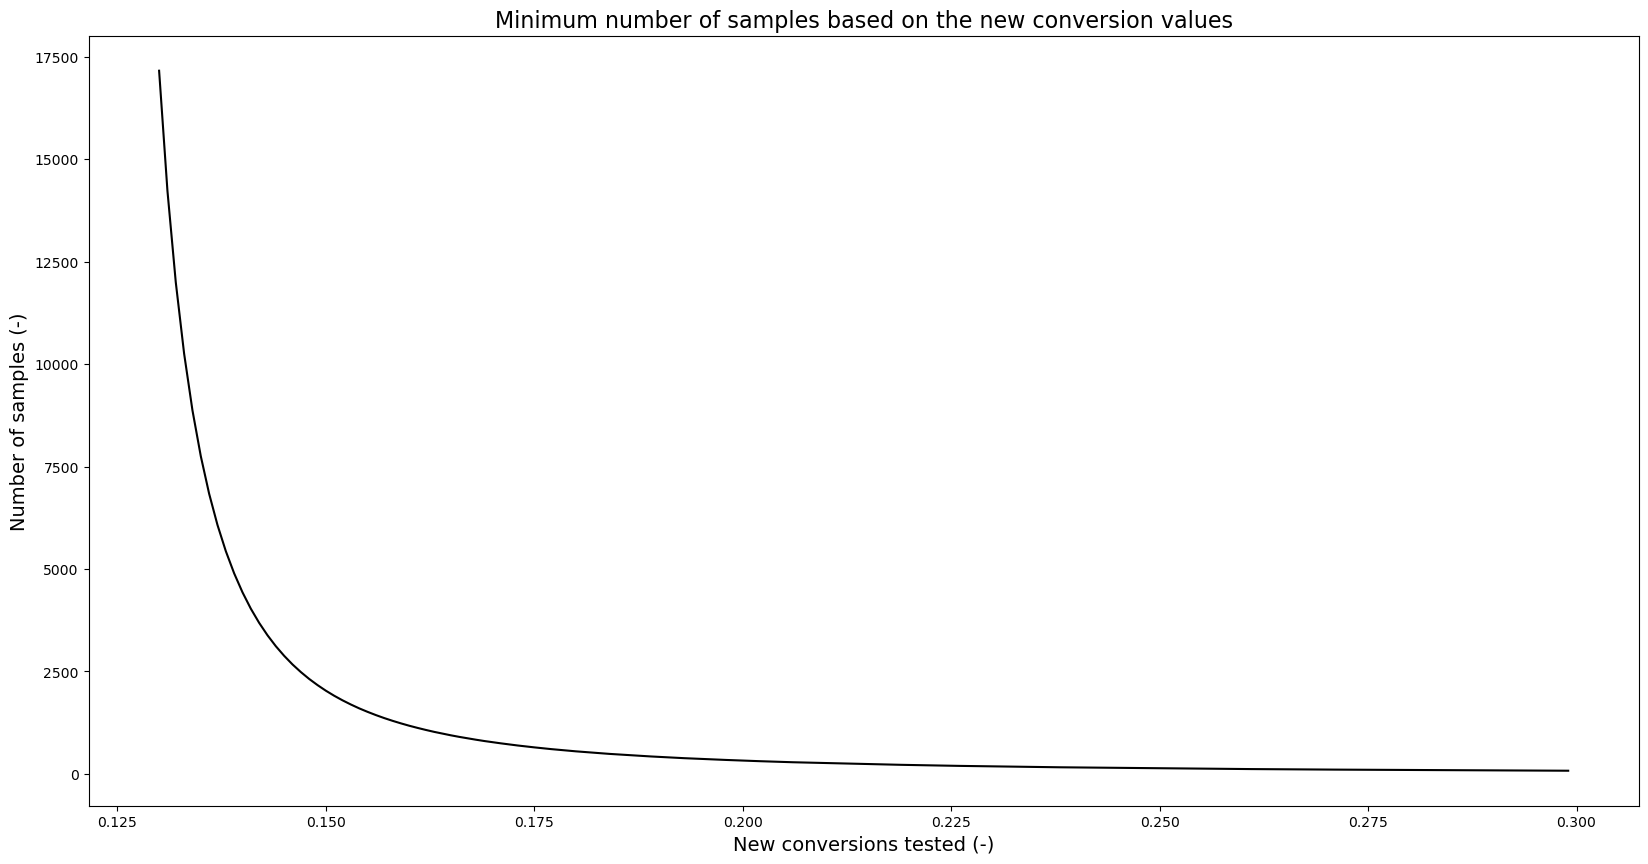

In [22]:
plt.figure(figsize=(20,10))
plt.plot(r, sample_n_list, color="black")

plt.xlabel("New conversions tested (-)", fontsize=14)
plt.ylabel("Number of samples (-)", fontsize=14)
plt.title("Minimum number of samples based on the new conversion values", fontsize=16);

Lower new conversion values result in lower conversion values differences. For lower differences, we need a high number of samples to observe a significant statistical difference in the hypotheses - that's what we see in the graph. However, for higher differences in the conversion values, we need more and more lower values for the number of samples to observe a significant statistical difference in the hypotheses.

        - If we want to test 1% difference of improvement in the conversion, we need thousands of samples.
        - But if we want to test a 10% difference or higher, we do not need big amounts of samples.
        
    That means it is harder and harder to prove there is a significant difference when we see few differences.

## 2. Data Description

In [23]:
df2 = data.copy()

## 2.1. Data Fields Meaning

In [24]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


- user_id: identification key for each user
- timestamp: date and time a user visited a webpage and performed an action (converted or not)
- group: whether users are from control or treatment group 
- landing_page: whether webpage is new or old
- converted: whether the user purchased or not using the webpage

## 2.2. Data Dimensions

In [25]:
print("Number of rows: {}".format(df2.shape[0]))
print("Number of cols: {}".format(df2.shape[1]))

Number of rows: 294478
Number of cols: 5


## 2.3. Data Types

In [26]:
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [28]:
df2["timestamp"] = pd.to_datetime(df2["timestamp"])

In [29]:
df2.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

In [30]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


## 2.4. Na Check

In [31]:
df2.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

## 2.5. Flag Analysis

We must assure people from control group are not in the treatment group and vice-versa. 

In [32]:
df2[["user_id", "group", "landing_page"]].groupby(["group", "landing_page"]).count().reset_index()

,group,landing_page,user_id
0,control,new_page,1928
1,control,old_page,145274
2,treatment,new_page,145311
3,treatment,old_page,1965


Since control group should only see the old page and treatment group the new page, we have duplicated people in:

- **control and new page:** 1928.
- **treatment and old page:** 1965.

Let's analyze now how many people and which of them are in both of the groups:

In [33]:
df2[["user_id", "group"]].groupby("user_id").count().reset_index().sort_values("group", ascending=False).head(10)

,user_id,group
91655,729669,2
179531,825266,2
30345,663033,2
41348,674959,2
225511,875210,2
45345,679326,2
277617,931907,2
221100,870418,2
77696,714496,2
70438,706601,2


In [34]:
df2[["user_id", "group"]].groupby("user_id").count().reset_index().query("group > 1")

,user_id,group
43,630052,2
111,630126,2
122,630137,2
281,630320,2
420,630471,2
...,...,...
290244,945627,2
290259,945645,2
290315,945703,2
290399,945797,2


In [35]:
# saving users which are duplicated
df_user_del = df2[["user_id", "group"]].groupby("user_id").count().reset_index().query("group > 1")["user_id"]

# removing duplicated user_id
df2 = df2[~df2["user_id"].isin(df_user_del)]

In [36]:
df2.shape

(286690, 5)

In [37]:
df2[["user_id", "group", "landing_page"]].groupby(["group", "landing_page"]).count().reset_index()

,group,landing_page,user_id
0,control,old_page,143293
1,treatment,new_page,143397


# 3. Random Sampling

Let's do a random sampling to define the groups of analysis.

In [38]:
df3 = df2.copy()

In [39]:
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


## 3.1. Control Sample

In [40]:
df_control_sample = df3[df3["group"] == "control"].sample(n=sample_n, random_state=42)

In [41]:
print(f"Control group size: {df_control_sample.shape[0]}.")

Control group size: 4433.


## 3.2. Treatment Sample

In [42]:
df_treatment_sample = df3[df3["group"] == "treatment"].sample(n=sample_n, random_state=42)

In [43]:
print(f"Treatment group size: {df_treatment_sample.shape[0]}.")

Treatment group size: 4433.


## 3.3. DataFrame A/B

In [44]:
df_ab = pd.concat([df_control_sample, df_treatment_sample]).reset_index()
df_ab.drop(columns="index", inplace=True)

In [45]:
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,663037,2017-01-05 02:13:38.063443,control,old_page,0
1,932826,2017-01-13 04:50:06.941679,control,old_page,1
2,922999,2017-01-04 07:19:23.813317,control,old_page,0
3,857826,2017-01-19 02:27:37.678241,control,old_page,0
4,762926,2017-01-18 17:50:59.261406,control,old_page,0


# 4. Webpage Conversion

## 4.1. Control Group

In [46]:
# people who purchased
sales = df_control_sample.loc[df_control_sample["converted"] == 1, "converted"].sum()

# everyone who visited the webpage (purchased or not)
visit = len(df_control_sample)

In [47]:
conv_rate_control = round(sales/visit, 4)
print(f"Control group conversion rate: {conv_rate_control*100}%.")

Control group conversion rate: 11.26%.


The higher the number of samples, the closest it is to the entire population conversion rate. As we may see below, the entire population conversion rate for the control group is:

In [48]:
population_conv_rate = df2[(df2["converted"] == 1) & (df2["group"] == "control")]["converted"].sum()/df2[(df2["group"] == "control")]["user_id"].nunique()
print(f"Population conversion rate: {population_conv_rate.round(2)*100}%.")

Population conversion rate: 12.0%.


This value above is the same as what we call by "current conversion". 

## 4.2. Treatment Group

In [49]:
# people who purchased
sales = df_treatment_sample.loc[df_treatment_sample["converted"] == 1, "converted"].sum()

# everyone who visited the webpage (purchased or not)
visit = len(df_treatment_sample)

In [50]:
conv_rate_treatment = round(sales/visit, 4)
print(f"Control group conversion rate: {conv_rate_treatment*100}%.")

Control group conversion rate: 12.7%.


# 5. Hypotheses Testing

In [51]:
df5 = df3.copy()

In [52]:
df5.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


We must make some questions in order better understand the problem to formulate the hypotheses. Let's first initiate **the possible steps with discrete/categorical response variable**. 

1. What is the data type of the response variable? 
        
        Binary. (discrete/categorical)
        
2. What is the sample size? 

        n < 5: Fisher's exact test
        n > 5: (1) Chi-squared test one or two samples or (2) Z-test

On the other hand, if we have a continuous response variable, the steps are:

1. What is the data type of the response variable?

        Continuous.
        
2. What do I want to look at the response variable? Ratio? Difference?

        Ratio.
        
3. Do we have dependent and independent variables in this ratio? 

        Yes: regression analysis.
        
4. If it is difference: what kind of difference?

        Variances: 
        
        (1) Fmax test 
        (2) Bartlett's test
        
        Averages: 
        
        (1) For one average/group we use One Sample t-test (t-student distribution)
        
        (2) For two averages/groups (control and treatment) 
        
            Parametric assumptions satisfied? 
            
                Independent samples, normal distribution (Shapiro-Wilk) and equal variance.
                                   * we may transform data into a normal
                                   
                Yes for two or more: we use Two Sample t-test (t-student distribution)
                        
                No: (1) Mann-Whitney or (2) Wilcoxon test
                
         (3) More than two averages/groups  
        
            Parametric assumptions satisfied? 
            
                Independent samples, normal distribution (Shapiro-Wilk) and equal variance.
                                   * we may transform data into a normal
                                   
                Yes for two or more: we use One Way ANOVA
        
                No: Kruskall-Wallis test

## 5.1. Application Examples

In this subsection, we are going to do some examples in order to understand the hypotheses test for different kinds.

### 5.1.1. Tree Height

We want to test if the average tree height is 15 cm. The status quo is 15 cm. However, we used fertilizer on some plants and now we want to test if it increased or decreased their height. Below, the data points we have:

In [53]:
df = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

In [54]:
np.mean(df).round(2)

14.33

We must analyze the number of samples and the current average to understand whether the 14.33 cm average is statistical significant or not. Below, the characteristics of this test:

1. Continuous data type.
2. Difference.
3. No.
4. Averages. It one average/group.

        It is two-tailed test since we want to evaluate whether the new average is higher or lower.

H<sub>0</sub>: μ = 15

H<sub>1</sub>: μ <> 15

In [57]:
statistic, pvalue = ttest_1samp(df, popmean=15)
print(f"p-value: {pvalue.round(2)}.")

p-value: 0.12.


In [61]:
alpha = 0.05

if pvalue < alpha:
    print("We reject the null hypothesis. There is significant difference between the groups.")
else:
    print("We accept the null hypothesis. There is no significant difference between the groups.")

We accept the null hypothesis. There is no significant difference between the groups.


Assuming alpha = 0.05 makes p-value > 0.12. That means the probability of null hypothesis is higher than the maximum randomness we admitted. Since it is higher, we may not reject the null hypothesis - we accept it.

The 14.33 cm average is NOT statistically significant. The null hypothesis is true: average is 15 cm.